In [3]:
!pip install numpy pandas tensorflow

In [9]:
import numpy as np 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.utils import to_categorical 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')/255
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')/255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [19]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation ='relu'))
model.add(Dense(10, activation ='softmax'))

model.compile(optimizer= 'adam', loss= 'categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 10, batch_size= 32, verbose = 1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8754 - loss: 0.4248
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9672 - loss: 0.1075
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9776 - loss: 0.0715
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9836 - loss: 0.0530
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9877 - loss: 0.0394
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9895 - loss: 0.0317
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9918 - loss: 0.0256
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9924 - loss: 0.0232
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9935 - loss: 0.0206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9940 - loss: 0.0171


In [21]:
loss, accuracy  = model.evaluate(X_test, y_test)
print(f"test loss : {loss: .4f}, test accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - accuracy: 0.9766 - loss: 0.1094
test loss :  0.0892, test accuracy: 0.9798


In [23]:

predictions = model.predict(X_test)


predicted_labels = np.argmax(predictions, axis=1)

actual_labels = np.argmax(y_test, axis=1)


for i in range(10):  # Checking the first 10 samples as an example
    print(f"Sample {i}: Predicted Label = {predicted_labels[i]}, Actual Label = {actual_labels[i]}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step
Sample 0: Predicted Label = 7, Actual Label = 7
Sample 1: Predicted Label = 2, Actual Label = 2
Sample 2: Predicted Label = 1, Actual Label = 1
Sample 3: Predicted Label = 0, Actual Label = 0
Sample 4: Predicted Label = 4, Actual Label = 4
Sample 5: Predicted Label = 1, Actual Label = 1
Sample 6: Predicted Label = 4, Actual Label = 4
Sample 7: Predicted Label = 9, Actual Label = 9
Sample 8: Predicted Label = 5, Actual Label = 5
Sample 9: Predicted Label = 9, Actual Label = 9


In [25]:
import matplotlib.pyplot as plt

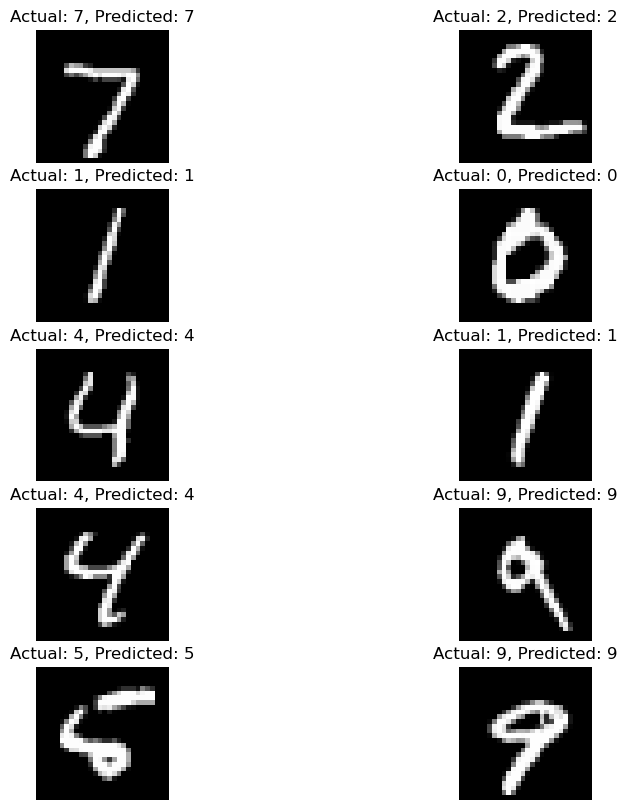

In [27]:

def display_images_with_labels(images, actual_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(10, 10))  
    for i in range(num_images):
        
        plt.subplot(5, 2, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # Reshape and display the image
        plt.title(f"Actual: {actual_labels[i]}, Predicted: {predicted_labels[i]}")
        plt.axis('off')  # Hide the axis for better visualization
    plt.show()

# Call the function to display the first 10 images from the test set
display_images_with_labels(X_test.reshape(-1, 28, 28), actual_labels, predicted_labels)